# Titanic (Random Forest)

In [19]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("../titanic-clean.csv")
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,1,22.0,1,0,S
1,1,1,0,38.0,1,0,C
2,1,3,0,26.0,0,0,S
3,1,1,0,35.0,1,0,S
4,0,3,1,35.0,0,0,S


<Axes: >

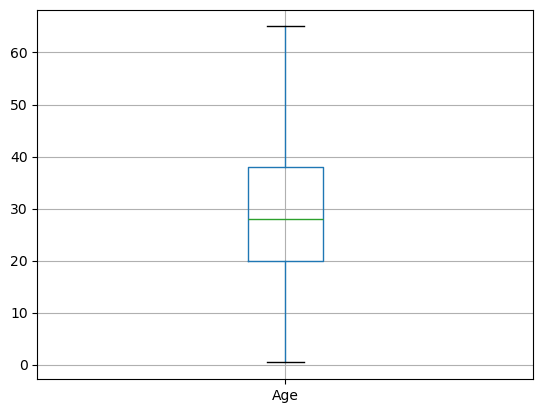

In [3]:
df.boxplot(column=["Age"])

## One-Hot Encoder

In [4]:
pd.get_dummies(df)

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked_C,Embarked_Q,Embarked_S
0,0,3,1,22.0,1,0,False,False,True
1,1,1,0,38.0,1,0,True,False,False
2,1,3,0,26.0,0,0,False,False,True
3,1,1,0,35.0,1,0,False,False,True
4,0,3,1,35.0,0,0,False,False,True
...,...,...,...,...,...,...,...,...,...
876,0,2,1,27.0,0,0,False,False,True
877,1,1,0,19.0,0,0,False,False,True
878,0,3,0,19.0,1,2,False,False,True
879,1,1,1,26.0,0,0,True,False,False


In [5]:
from sklearn.preprocessing import OneHotEncoder

In [6]:
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
# encoder.fit(df[["Embarked"]])
encoded = encoder.fit_transform(df[["Embarked"]])
encoded

array([[0., 0., 1.],
       [1., 0., 0.],
       [0., 0., 1.],
       ...,
       [0., 0., 1.],
       [1., 0., 0.],
       [0., 1., 0.]])

In [7]:
encoded_features = encoder.get_feature_names_out()
encoded_features

array(['Embarked_C', 'Embarked_Q', 'Embarked_S'], dtype=object)

In [8]:
# testing
encoder.transform([['C'], ['Q'], ['H']])

C:\ProgramData\Miniconda3\envs\ai\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(


array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 0.]])

In [9]:
df_encoded = pd.DataFrame(data=encoded, columns=encoded_features)
df_encoded.head()

,Embarked_C,Embarked_Q,Embarked_S
0,0.0,0.0,1.0
1,1.0,0.0,0.0
2,0.0,0.0,1.0
3,0.0,0.0,1.0
4,0.0,0.0,1.0


In [10]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked
0,0,3,1,22.0,1,0,S
1,1,1,0,38.0,1,0,C
2,1,3,0,26.0,0,0,S
3,1,1,0,35.0,1,0,S
4,0,3,1,35.0,0,0,S


In [11]:
df = pd.merge(df, df_encoded, left_index=True, right_index=True)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked,Embarked_C,Embarked_Q,Embarked_S
0,0,3,1,22.0,1,0,S,0.0,0.0,1.0
1,1,1,0,38.0,1,0,C,1.0,0.0,0.0
2,1,3,0,26.0,0,0,S,0.0,0.0,1.0
3,1,1,0,35.0,1,0,S,0.0,0.0,1.0
4,0,3,1,35.0,0,0,S,0.0,0.0,1.0


In [12]:
df.drop(columns=["Embarked"], inplace=True)
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Embarked_C,Embarked_Q,Embarked_S
0,0,3,1,22.0,1,0,0.0,0.0,1.0
1,1,1,0,38.0,1,0,1.0,0.0,0.0
2,1,3,0,26.0,0,0,0.0,0.0,1.0
3,1,1,0,35.0,1,0,0.0,0.0,1.0
4,0,3,1,35.0,0,0,0.0,0.0,1.0


## Train / Test Split

In [13]:
from sklearn.model_selection import train_test_split

In [14]:
X = df.drop(columns=["Survived"])
y = df["Survived"]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.20, random_state=42)

X_train.shape, X_test.shape

((704, 8), (177, 8))

## Training

In [15]:
from sklearn.ensemble import RandomForestClassifier

In [38]:
model = RandomForestClassifier(n_estimators=10,
                               max_depth=3,
                               n_jobs=-1,
                               random_state=42,
                               verbose=1)
model.fit(X_train, y_train)

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=-1)]: Done  10 out of  10 | elapsed:    0.0s finished


RandomForestClassifier(max_depth=3, n_estimators=10, n_jobs=-1, random_state=42,
                       verbose=1)

In [39]:
model.estimators_

[DecisionTreeClassifier(max_depth=3, max_features='sqrt',
                        random_state=1608637542),
 DecisionTreeClassifier(max_depth=3, max_features='sqrt',
                        random_state=1273642419),
 DecisionTreeClassifier(max_depth=3, max_features='sqrt',
                        random_state=1935803228),
 DecisionTreeClassifier(max_depth=3, max_features='sqrt', random_state=787846414),
 DecisionTreeClassifier(max_depth=3, max_features='sqrt', random_state=996406378),
 DecisionTreeClassifier(max_depth=3, max_features='sqrt',
                        random_state=1201263687),
 DecisionTreeClassifier(max_depth=3, max_features='sqrt', random_state=423734972),
 DecisionTreeClassifier(max_depth=3, max_features='sqrt', random_state=415968276),
 DecisionTreeClassifier(max_depth=3, max_features='sqrt', random_state=670094950),
 DecisionTreeClassifier(max_depth=3, max_features='sqrt',
                        random_state=1914837113)]

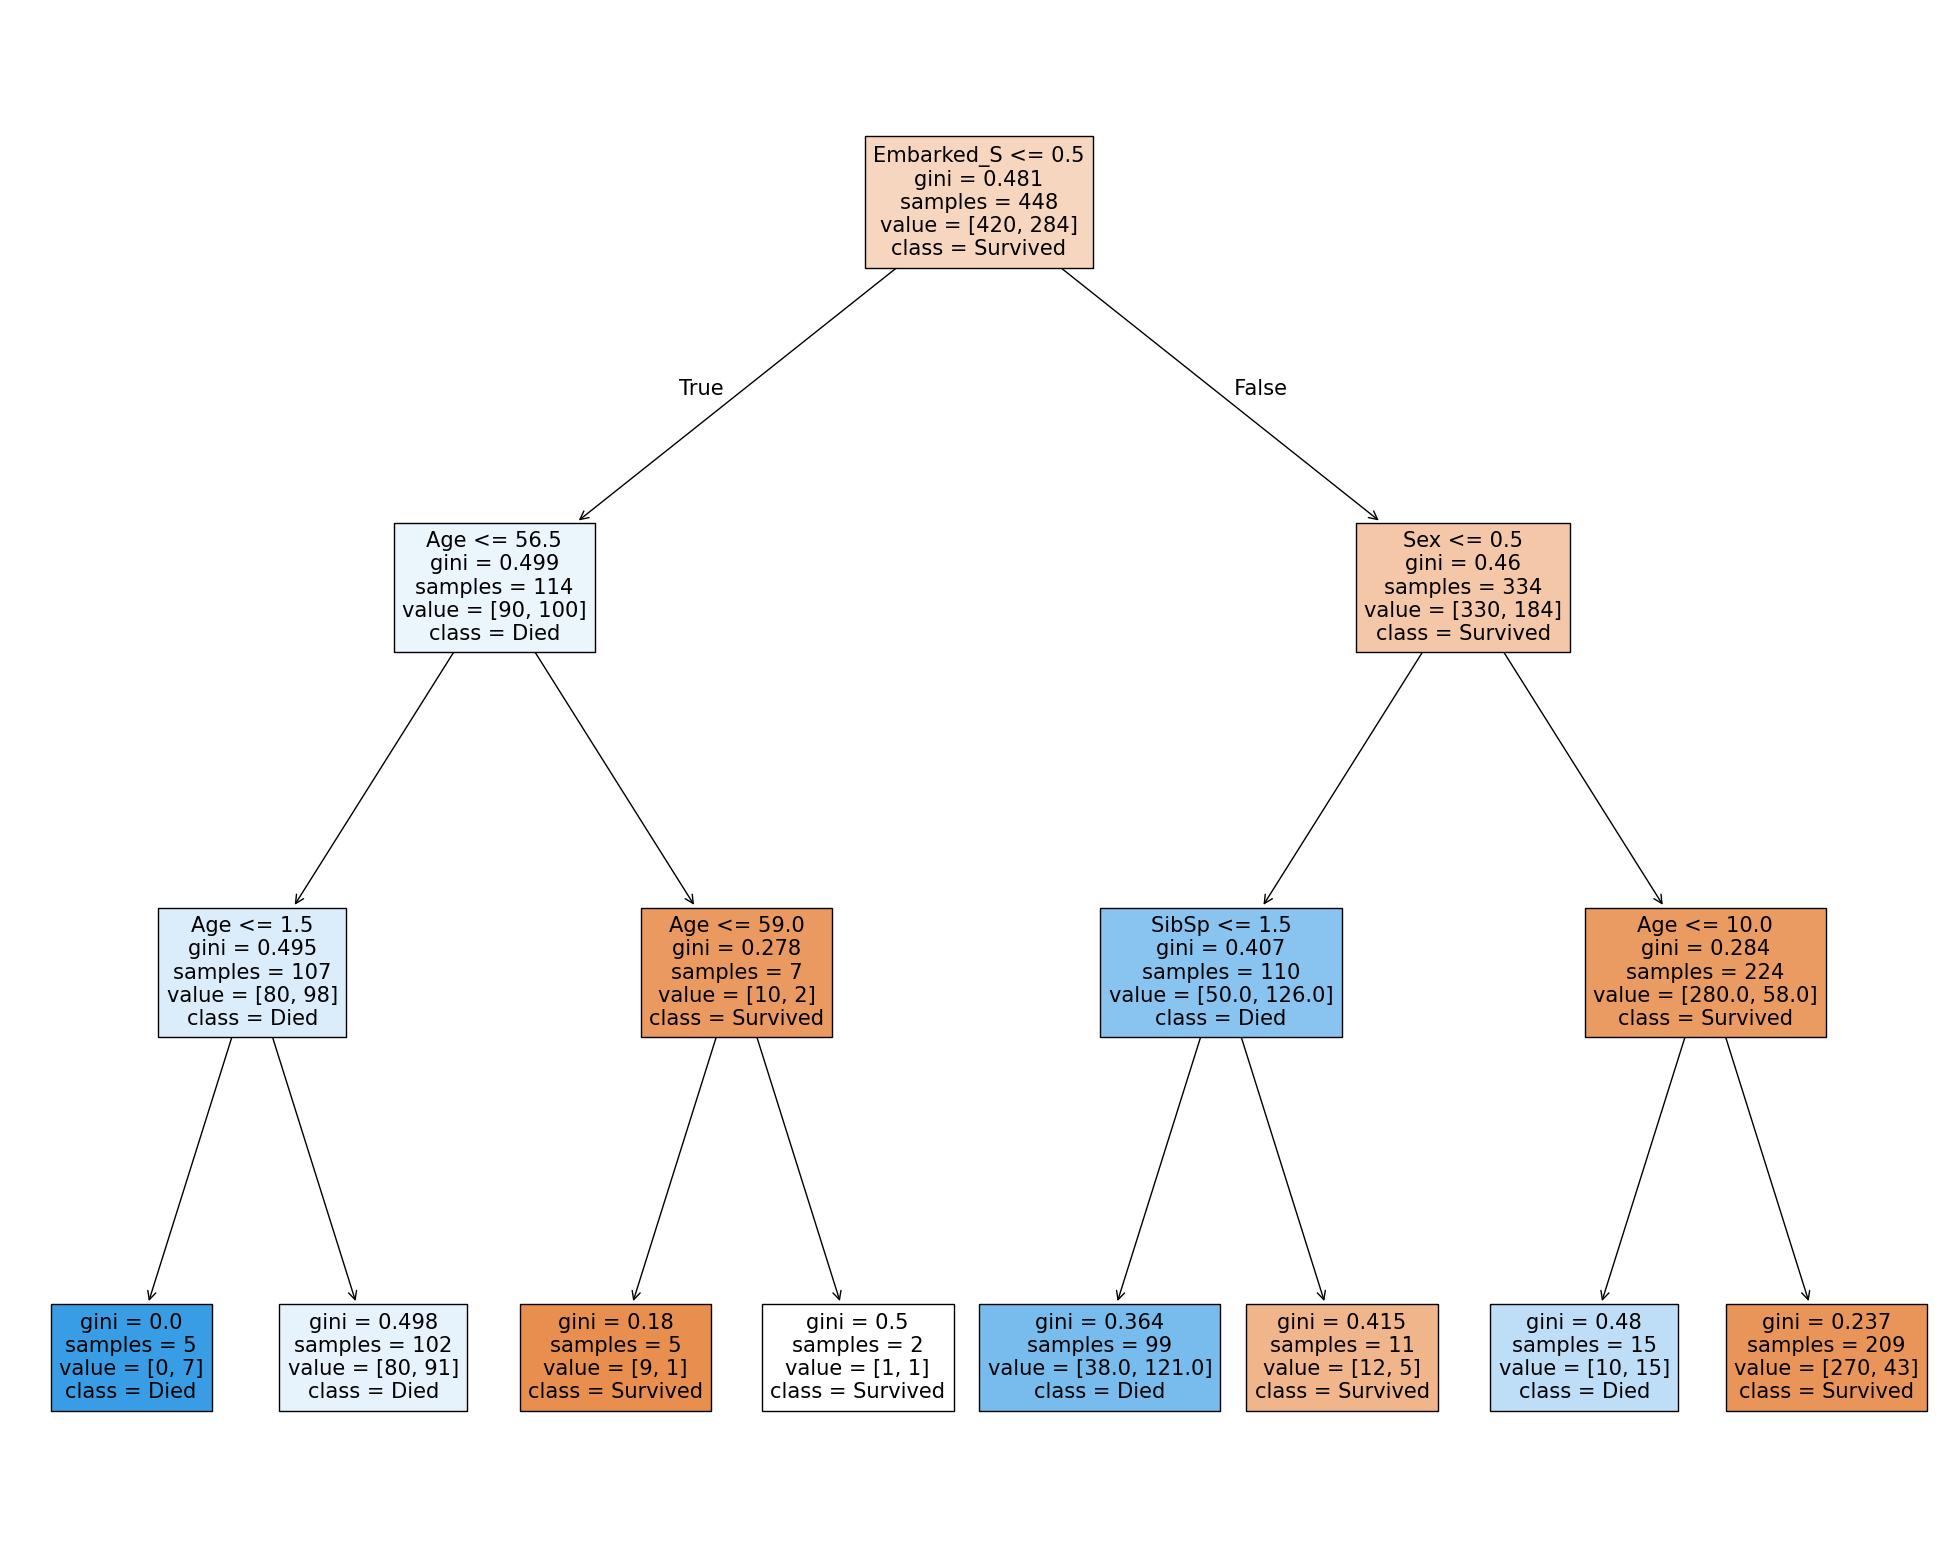

In [26]:
from sklearn.tree import plot_tree

fig = plt.figure(figsize=(25,20))
_ = plot_tree(model.estimators_[90], 
               feature_names=X.columns,  
               class_names=["Survived", "Died"],
               filled=True)
plt.show()

## Evaluation Metrics

In [40]:
model.score(X_test, y_test)

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done   6 out of  10 | elapsed:    0.0s remaining:    0.0s
[Parallel(n_jobs=8)]: Done  10 out of  10 | elapsed:    0.0s finished


0.8248587570621468

In [28]:
model.score(X_train, y_train)

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished


0.8181818181818182

### Accuracy

In [29]:
model.score(X_test, y_test)

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished


0.8305084745762712

In [30]:
predictions = model.predict(X_test)
predictions

[Parallel(n_jobs=8)]: Using backend ThreadingBackend with 8 concurrent workers.
[Parallel(n_jobs=8)]: Done  34 tasks      | elapsed:    0.0s
[Parallel(n_jobs=8)]: Done 100 out of 100 | elapsed:    0.0s finished


array([0, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0,
       0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1,
       0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1,
       0], dtype=int64)

In [29]:
y_test.values

array([0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1,
       1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1,
       0], dtype=int64)

In [30]:
correct = 0
wrong = 0
for i in range(len(y_test)):
    if predictions[i] == y_test.values[i]:
        correct += 1
    else:
        wrong += 1

correct, wrong

(146, 31)

In [31]:
import numpy as np

In [32]:

np.absolute(predictions - y_test.values).sum()

31

In [33]:
146 / (146 + 31)

0.8248587570621468

### Confusion Matrix

In [31]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [32]:
model.classes_

array([0, 1], dtype=int64)

In [33]:
cm = confusion_matrix(y_test, predictions, labels=model.classes_)
cm

array([[92, 12],
       [18, 55]], dtype=int64)

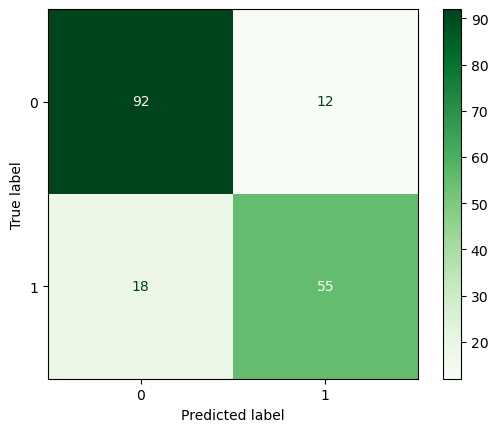

In [35]:
disp = ConfusionMatrixDisplay(cm, display_labels=model.classes_)
disp.plot(cmap="Greens")
plt.show()

In [38]:
recall_0 = 95 / (95 + 9)
recall_1 = 51 / (51 + 22)
recall_0, recall_1

(0.9134615384615384, 0.6986301369863014)

In [39]:
precision_0 = 95 / (95 + 22)
precision_1 = 51 / (51 + 9)
precision_0, precision_1

(0.811965811965812, 0.85)

F1 = 2 * precision * recall / (precision + recall)
F1 = TP / (TP + 1/2 * (FP + FN))
F1 = 51 / (51 + 0.5 * (9 + 22))


In [40]:
F1 = 51 / (51 + 0.5 * (9 + 22))
F1

0.7669172932330827

In [36]:
from sklearn.metrics import f1_score

In [37]:
f1_score(y_test, predictions)

0.7857142857142857

## Important Features

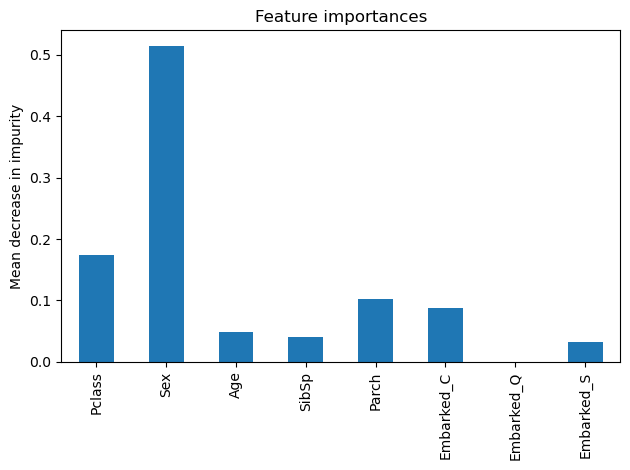

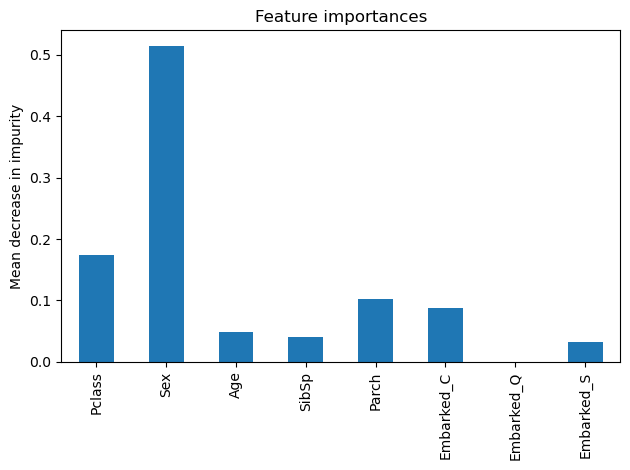

In [48]:
feature_importances = model.feature_importances_
series = pd.Series(feature_importances, index=X.columns)

fig, ax = plt.subplots()
series.plot.bar(ax=ax)
ax.set_title("Feature importances")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()
plt.show()

In [45]:
series

Pclass        0.174516
Sex           0.514253
Age           0.049060
SibSp         0.040434
Parch         0.101989
Embarked_C    0.087469
Embarked_Q    0.000000
Embarked_S    0.032279
dtype: float64

# Saving Model

In [43]:
model.feature_names_in_

array(['Pclass', 'Sex', 'Age', 'SibSp', 'Parch', 'Embarked_C',
       'Embarked_Q', 'Embarked_S'], dtype=object)

In [44]:
test_record = [1, 1, 30, 2, 2, 'S']
encoder.transform([['S']])

C:\ProgramData\Miniconda3\envs\ai\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but OneHotEncoder was fitted with feature names
  warnings.warn(


array([[0., 0., 1.]])

In [45]:
# ["Pclass", "Age", "SibSp", "Parch"]
scaler.transform([[1, 30, 2, 2]])

C:\ProgramData\Miniconda3\envs\ai\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but RobustScaler was fitted with feature names
  warnings.warn(


array([[-2.        ,  0.11111111,  2.        ,  2.        ]])

In [46]:
test_record = [0, 1, 0.45, 0.25, 0.33, 0, 0, 1]
model.predict([test_record])

C:\ProgramData\Miniconda3\envs\ai\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


array([0], dtype=int64)

In [47]:
model.predict_proba([test_record])

C:\ProgramData\Miniconda3\envs\ai\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


array([[0.85056546, 0.14943454]])

In [48]:
import pickle

In [49]:
with open("model.pickle", "wb") as f:
    pickle.dump(model, f)

with open("encoder.pickle", "wb") as f:
    pickle.dump(encoder, f)

with open("scaler.pickle", "wb") as f:
    pickle.dump(scaler, f)

In [50]:
with open("model.pickle", "rb") as f:
    new_model = pickle.load(f)

new_model

MLPClassifier(early_stopping=True, hidden_layer_sizes=(10, 10), max_iter=1000,
              n_iter_no_change=100, verbose=True)

In [51]:
new_model.predict_proba([test_record])

C:\ProgramData\Miniconda3\envs\ai\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but MLPClassifier was fitted with feature names
  warnings.warn(


array([[0.85056546, 0.14943454]])